In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data.csv')
df

,Trader,Asset Name,Status,Trade Type,Payout,Investment,Trader Profit,Trading Strike,Close Strike,Trading Time,Close Time
0,trader C,AUD/USD,Closed,Put,1.85,1000,-1000.000,0.69676,0.69724,2020-06-10 03:00:01.760,2020-06-10 03:05:00.000
1,trader C,EUR/JPY,Closed,Call,1.85,10000,8500.000,116.35500,116.36400,2020-04-27 02:30:01.370,2020-04-27 02:35:00.000
2,trader C,EUR/USD,Closed,Call,1.85,5000,-5000.000,1.09412,1.09378,2020-04-15 07:45:01.810,2020-04-15 07:50:00.000
3,trader C,EUR/JPY,Closed,Call,1.95,1000,950.000,119.69900,119.71600,2019-09-13 18:57:25.390,2019-09-13 18:58:25.390
4,trader C,EUR/USD,Closed,Put,1.85,1000,-1000.000,1.21202,1.21202,2020-12-03 02:55:00.520,2020-12-03 03:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...
3394,trader C,AUD/USD,Closed,Call,1.85,1000,-1000.000,0.76130,0.76091,2021-04-04 23:00:58.950,2021-04-04 23:05:58.950
3395,trader C,EUR/USD,Closed,Call,1.88,20000,17600.000,1.12285,1.12358,2020-03-06 05:59:58.740,2020-03-06 06:05:00.000
3396,trader C,NZD/JPY,Closed,Put,1.90,1000,-1000.000,63.70600,63.71300,2020-04-02 01:28:05.140,2020-04-02 01:31:05.140
3397,trader A,BITCOIN,Sold,Call,2.05,3435,2662.041,32669.30000,32829.60000,2021-06-21 06:37:12.820,2021-06-21 06:38:10.123


In [4]:
df['Trader'].replace(['trader A', 'trader B', 'trader C', 'trader E'], [0, 1, 2, 3], inplace=True)
df['Status'].replace(['Closed', 'Sold'], [0,1], inplace=True)
df['Trade Type'].replace(['Call', 'Put'], [0,1], inplace=True)

In [5]:
df = df.drop(['Asset Name'], axis=1)

In [6]:
df['Trading Time'] = pd.to_datetime(df['Trading Time'])
df['Close Time'] = pd.to_datetime(df['Close Time'])

In [7]:
df = df.drop(['Trading Time', 'Close Time'], axis=1)

In [8]:
from sklearn import svm

In [9]:
clf_svm = svm.OneClassSVM(kernel="rbf", degree=3, gamma=0.1, nu=0.01, max_iter=-1)
y_predict = clf_svm.fit_predict(df)
svm_predict = pd.Series(y_predict).replace([-1, 1], [1, 0])
svm_anomalies = df[svm_predict==1]

In [10]:
cmap = np.array(['skyblue', 'red'])

In [16]:
def plot_OCSVM(i):
    plt.scatter(df.iloc[:,i],df.iloc[:,i+1],c='skyblue',s=40, edgecolor="k")
    plt.scatter(svm_anomalies.iloc[:,i],svm_anomalies.iloc[:,i+1],c='red', s=40, edgecolor="k")
    plt.title("Visualize OC-SVM Anomalies between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

In [17]:
df.dtypes

Trader              int64
Status              int64
Trade Type          int64
Payout            float64
Investment          int64
Trader Profit     float64
Trading Strike    float64
Close Strike      float64
dtype: object

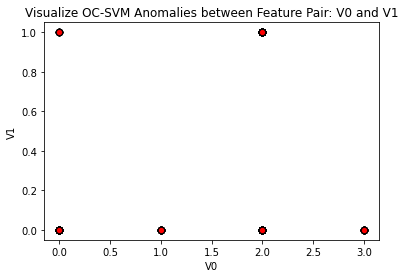

In [19]:
plot_OCSVM(0)

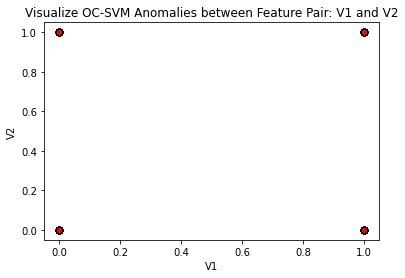

In [20]:
plot_OCSVM(1)

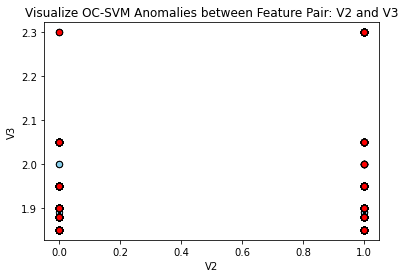

In [21]:
plot_OCSVM(2)

coments....

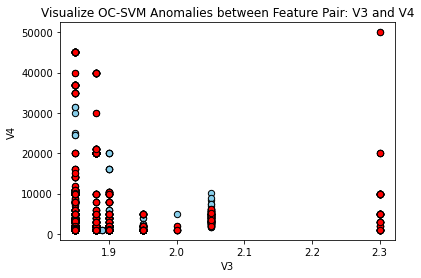

In [22]:
plot_OCSVM(3)

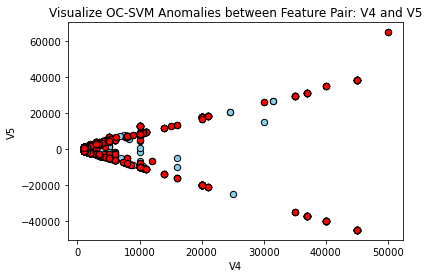

In [23]:
plot_OCSVM(4)

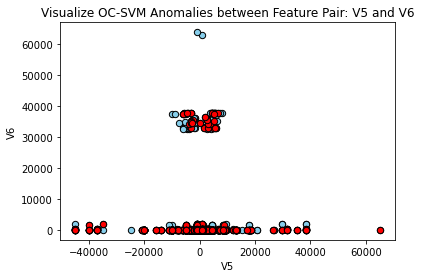

In [24]:
plot_OCSVM(5)

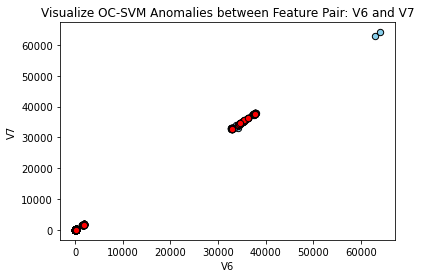

In [25]:
plot_OCSVM(6)